In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import gym
import matplotlib.pyplot as plt
import torch

from agent import Agent, add_noise
from hill_climbing import perform_hill_climbing

https://openai.com/requests-for-research/#cartpole

## Explore `gym` and the `CartPole-v0` environment

In [18]:
env = gym.envs.make('CartPole-v0')

In [19]:
env.reset()

array([-0.0247115 , -0.00177759,  0.03405816, -0.0013165 ])

In [20]:
env.action_space

Discrete(2)

In [21]:
env.observation_space

Box(4,)

Watch an untrained agent

In [ ]:
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=16)
cartpole_agent.watch_me(env, steps=300)

## Apply Hill Climbing Algorithm to solve Environment

In [22]:
torch.random.manual_seed(42)
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=4)
n_episodes = 1000
initial_noise_std = 0.01

In [23]:
opt_agent, return_history = perform_hill_climbing(cartpole_agent, env, n_episodes=n_episodes,
                                                  initial_noise_std=initial_noise_std,
                                                  population_size=1)

Start with Return Estimate G = 16.0
Episode 0 - Improved G to G_best = 18.0
Episode 0	Average Score: 17.00
Episode 1 - Improved G to G_best = 25.0
Episode 2 - Improved G to G_best = 55.0
Episode 3 - Improved G to G_best = 61.0
Episode 74 - Improved G to G_best = 65.0
Episode 100	Average Score: 22.12
Episode 159 - Improved G to G_best = 75.0
Episode 200	Average Score: 21.57
Episode 300	Average Score: 20.85
Episode 315 - Improved G to G_best = 92.0
Episode 400	Average Score: 22.08
Episode 500	Average Score: 22.67
Episode 600	Average Score: 20.90
Episode 700	Average Score: 20.91
Episode 800	Average Score: 21.54
Episode 900	Average Score: 20.38


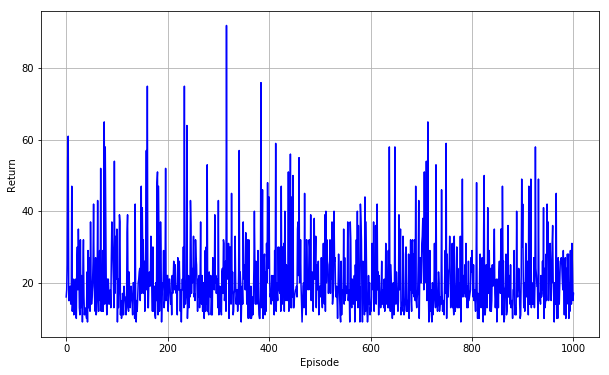

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(len(return_history)), return_history, 'b-')
plt.grid(True)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.show()

Watch a (slightly) improved agent

In [ ]:
opt_agent.watch_me(env, steps=300)

## Change over to Steepest Ascent Hill Climbing and its Flavors

### without adaptive noise

In [29]:
torch.random.manual_seed(42)
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=4)
n_episodes = 500
initial_noise_std = 0.01
population_size = 30
use_adaptive_noise = False

In [30]:
opt_agent, return_history = perform_hill_climbing(cartpole_agent, env, n_episodes=n_episodes,
                                                  population_size=population_size,
                                                  initial_noise_std=initial_noise_std,
                                                  use_adaptive_noise=use_adaptive_noise)

Start with Return Estimate G = 83.0
Episode 0	Average Score: 70.00
Episode 2 - Improved G to G_best = 93.0
Episode 60 - Improved G to G_best = 98.0
Episode 100	Average Score: 53.43
Episode 121 - Improved G to G_best = 107.0
Episode 200	Average Score: 53.79
Episode 300	Average Score: 54.06
Episode 317 - Improved G to G_best = 112.0
Episode 339 - Improved G to G_best = 120.0
Episode 400	Average Score: 55.48
Episode 489 - Improved G to G_best = 133.0


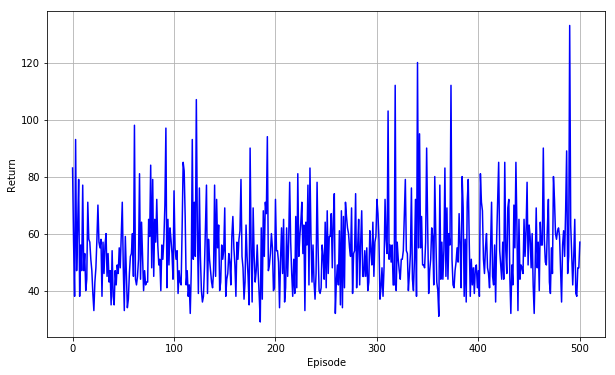

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(return_history)), return_history, 'b-')
plt.grid(True)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.show()

In [ ]:
opt_agent.watch_me(env, steps=300)

### with adaptive noise

In [40]:
torch.random.manual_seed(42)
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=4)
n_episodes = 400
initial_noise_std = 0.01
population_size = 30
use_adaptive_noise = True

In [41]:
opt_agent, return_history = perform_hill_climbing(cartpole_agent, env, n_episodes=n_episodes,
                                                  population_size=population_size,
                                                  initial_noise_std=initial_noise_std,
                                                  use_adaptive_noise=use_adaptive_noise)

Start with Return Estimate G = 28.0
Episode 0 - Improved G to G_best = 30.0
Episode 0	Average Score: 29.00
Episode 1 - Improved G to G_best = 40.0
Episode 2 - Improved G to G_best = 41.0
Episode 3 - Improved G to G_best = 68.0
Episode 14 - Improved G to G_best = 107.0
Episode 16 - Improved G to G_best = 141.0
Episode 17 - Improved G to G_best = 142.0
Episode 18 - Improved G to G_best = 200.0
Episode 100	Average Score: 156.50
Episode 200	Average Score: 173.92
Episode 300	Average Score: 175.43


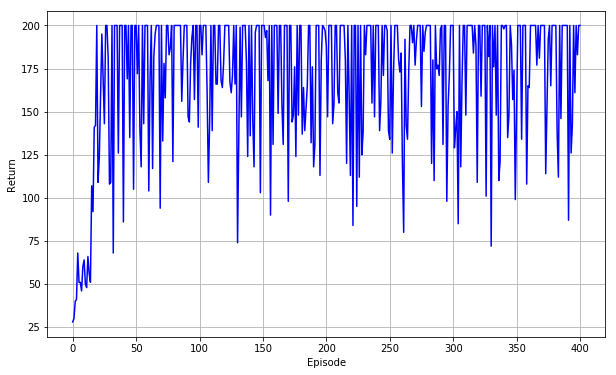

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(return_history)), return_history, 'b-')
plt.grid(True)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.show()

In [43]:
opt_agent.watch_me(env, steps=300)

### Use Cross Entropy Metod

In [44]:
torch.random.manual_seed(42)
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=4)
n_episodes = 400
initial_noise_std = 0.01
population_size = 30
cem_frac = 0.25
use_adaptive_noise = False
use_cem = True

In [45]:
opt_agent, return_history = perform_hill_climbing(cartpole_agent, env, n_episodes=n_episodes,
                                                  population_size=population_size,
                                                  cem_frac=cem_frac,
                                                  initial_noise_std=initial_noise_std,
                                                  use_adaptive_noise=use_adaptive_noise,
                                                  use_cem=use_cem)

Start with Return Estimate G = 17.0
Episode 0 - Improved G to G_best = 43.42857142857143
Episode 0	Average Score: 30.21
Episode 3 - Improved G to G_best = 43.857142857142854
Episode 17 - Improved G to G_best = 45.142857142857146
Episode 32 - Improved G to G_best = 48.142857142857146
Episode 68 - Improved G to G_best = 48.57142857142857
Episode 100	Average Score: 36.62
Episode 141 - Improved G to G_best = 50.857142857142854
Episode 167 - Improved G to G_best = 52.57142857142857
Episode 200	Average Score: 37.28
Episode 231 - Improved G to G_best = 55.0
Episode 240 - Improved G to G_best = 55.285714285714285
Episode 300	Average Score: 36.72


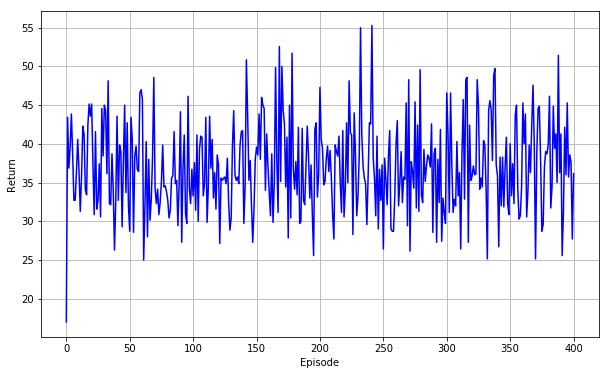

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(return_history)), return_history, 'b-')
plt.grid(True)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.show()

In [ ]:
opt_agent.watch_me(env, steps=300)

## Use Evolution Strategy

In [47]:
torch.random.manual_seed(42)
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=4)
n_episodes = 400
initial_noise_std = 0.01
population_size = 30
use_adaptive_noise = True
use_evolution = True

In [ ]:
opt_agent, return_history = perform_hill_climbing(cartpole_agent, env, n_episodes=n_episodes,
                                                  population_size=population_size,
                                                  initial_noise_std=initial_noise_std,
                                                  use_adaptive_noise=use_adaptive_noise,
                                                  use_evolution=use_evolution)

Start with Return Estimate G = 21.0
Episode 0	Average Score: 18.50
Episode 1 - Improved G to G_best = 26.0
Episode 7 - Improved G to G_best = 35.0
Episode 12 - Improved G to G_best = 49.0
Episode 14 - Improved G to G_best = 64.0
Episode 15 - Improved G to G_best = 116.0
Episode 16 - Improved G to G_best = 153.0
Episode 19 - Improved G to G_best = 159.0
Episode 20 - Improved G to G_best = 191.0
Episode 28 - Improved G to G_best = 200.0
Episode 100	Average Score: 153.55
Episode 200	Average Score: 182.48


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(return_history)), return_history, 'b-')
plt.grid(True)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.show()

In [ ]:
opt_agent.watch_me(env, steps=300)

## Hm, that still doesn't look nice

Eventually, the search space for the stochastic policy search is too complex and reducing the set of parameters might help